# **Helllo  its daya 28 today we have  task of Diabetes, Hypertension and Stroke Prediction useing differnt machine learning **

In [51]:
##import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import catboost
import xgboost
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
##read data  and  drop null values 
d_d=pd.read_csv("diabetes_data.csv").dropna()
s_d=pd.read_csv("stroke_data.csv").dropna()
h_d=pd.read_csv("hypertension_data.csv").dropna()


In [54]:
d_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56122 entries, 0 to 56121
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   56122 non-null  float64
 1   Sex                   56122 non-null  float64
 2   HighChol              56122 non-null  float64
 3   CholCheck             56122 non-null  float64
 4   BMI                   56122 non-null  float64
 5   Smoker                56122 non-null  float64
 6   HeartDiseaseorAttack  56122 non-null  float64
 7   PhysActivity          56122 non-null  float64
 8   Fruits                56122 non-null  float64
 9   Veggies               56122 non-null  float64
 10  HvyAlcoholConsump     56122 non-null  float64
 11  GenHlth               56122 non-null  float64
 12  MentHlth              56122 non-null  float64
 13  PhysHlth              56122 non-null  float64
 14  DiffWalk              56122 non-null  float64
 15  Stroke             

In [55]:
s_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [56]:
h_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26058 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26058 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26058 non-null  int64  
 3   trestbps  26058 non-null  int64  
 4   chol      26058 non-null  int64  
 5   fbs       26058 non-null  int64  
 6   restecg   26058 non-null  int64  
 7   thalach   26058 non-null  int64  
 8   exang     26058 non-null  int64  
 9   oldpeak   26058 non-null  float64
 10  slope     26058 non-null  int64  
 11  ca        26058 non-null  int64  
 12  thal      26058 non-null  int64  
 13  target    26058 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.0 MB


In [57]:
d_d.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000,56122.000000
mean,8.386800,0.450216,0.488668,0.970689,29.327038,0.465735,0.128345,0.722622,0.620666,0.796978,0.047931,2.710417,3.546684,5.195289,0.219825,0.054150,0.513916,0.370194
std,2.941363,0.497520,0.499876,0.168679,7.007981,0.498829,0.334477,0.447709,0.485226,0.402252,0.213623,1.105891,7.906338,9.577588,0.414131,0.226315,0.499811,0.482861
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
s_d.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000
mean,0.555162,51.327303,0.213851,0.127729,0.821326,3.461095,0.514851,122.079679,30.406488,0.488572,0.500159
std,0.496954,21.624171,0.410028,0.333792,0.383083,0.780934,0.499786,57.561951,6.835305,0.499875,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [59]:
h_d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26058.000000,26058.00000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,0.50000,0.956635,131.590682,246.286591,0.149896,0.526057,149.643181,0.326886,1.039742,1.399724,0.720623,2.319057,0.547778
std,15.190407,0.50001,1.022467,17.597086,51.651701,0.356977,0.525688,22.865871,0.469084,1.165673,0.616529,1.011317,0.604868,0.497722
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


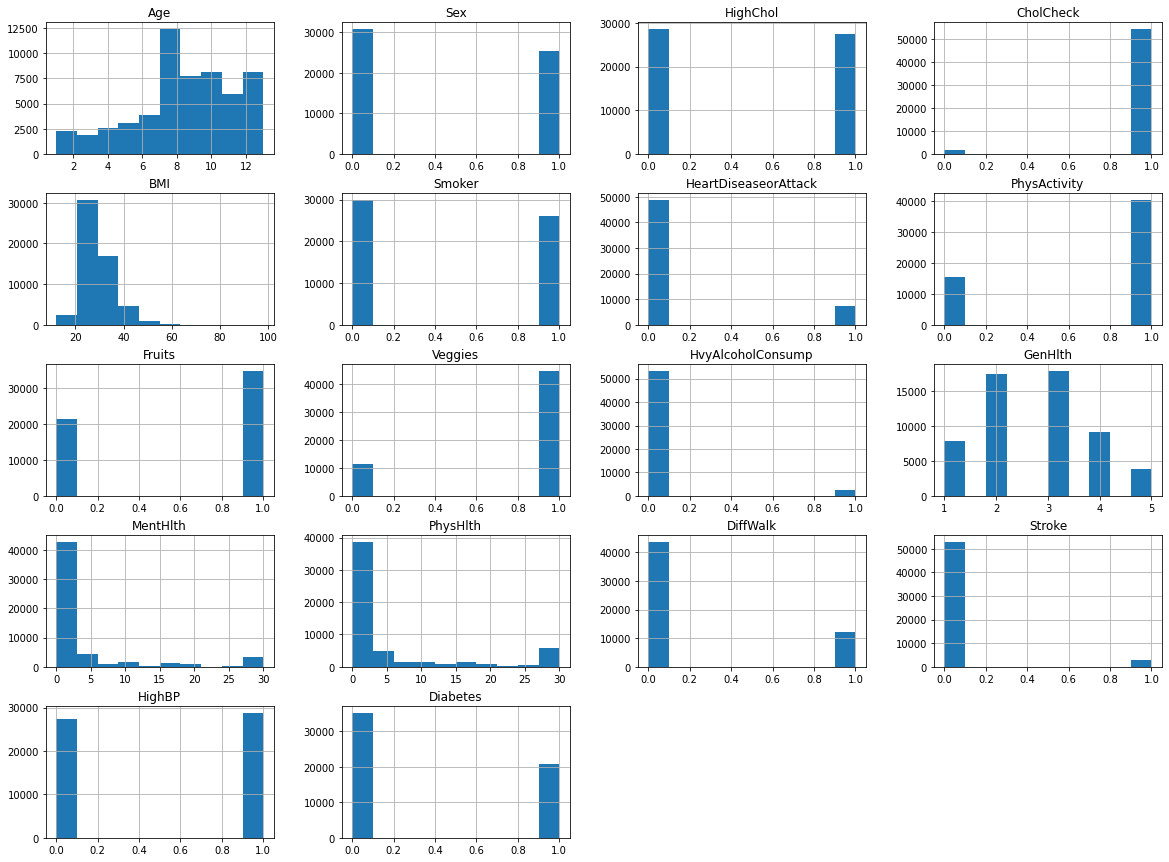

In [63]:
d_d.hist(figsize=(20,15))
plt.show()

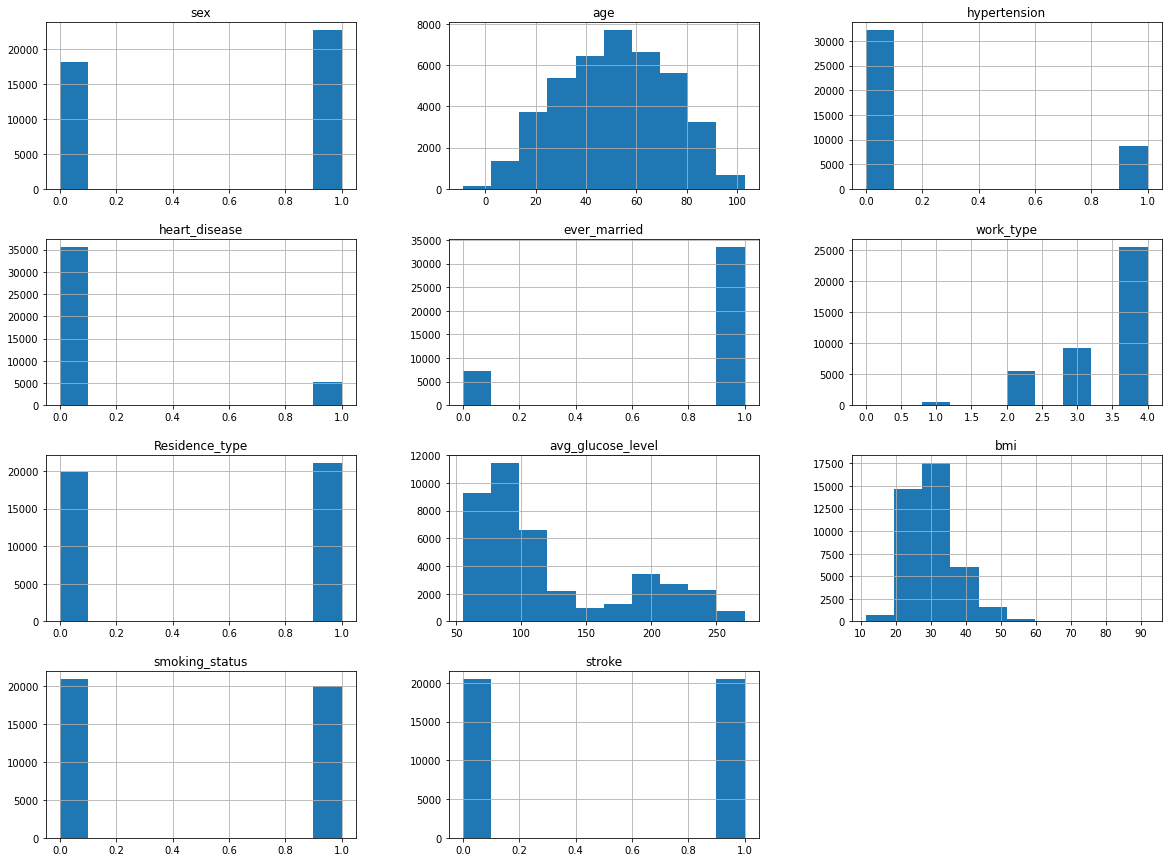

In [64]:
s_d.hist(figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9e1fc6040>,
      dtype=object)

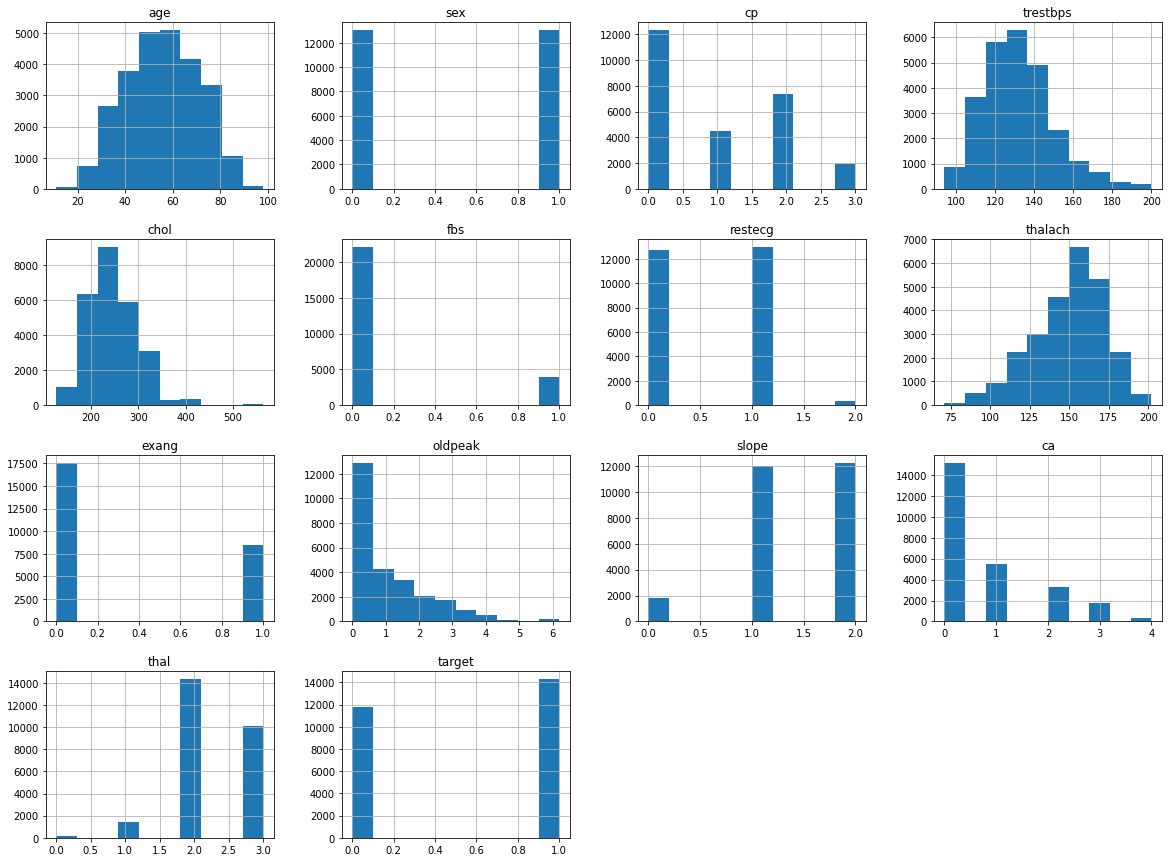

In [65]:
h_d.hist(figsize=(20,15))

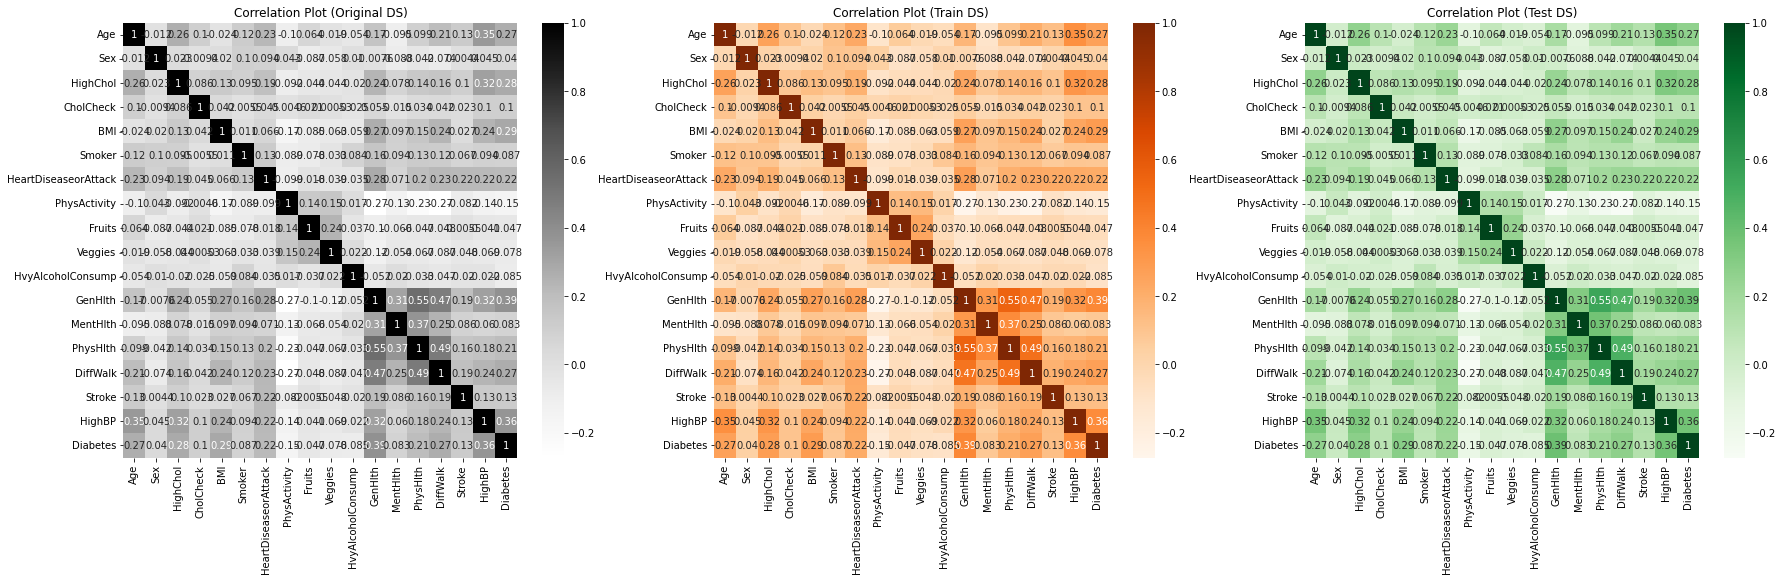

In [4]:
## cheaking corelation with heatmap 

plt.figure(figsize=(30, 8))

plt.subplot(1, 3, 1)
sns.heatmap(d_d.corr(), annot=True, cmap='Greys')
plt.title('Correlation Plot (Original DS)')

plt.subplot(1, 3, 2)
sns.heatmap(d_d.corr(), annot=True, cmap='Oranges')
plt.title('Correlation Plot (Train DS)')

plt.subplot(1, 3, 3)
sns.heatmap(d_d.corr(), annot=True, cmap='Greens')
plt.title('Correlation Plot (Test DS)')
plt.show()

In [10]:
## define a model 
def model_evaluate(model,model_name,data,p_col):
    x,y=data.drop(columns=[p_col]),data[p_col]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    ss=StandardScaler()
    x_train_s=ss.fit(x_train)
    x_test_s=ss.fit(x_test)
    print(f"\n-------------------{model_name}----------------------")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"accuracy_score_for {model_name}:{accuracy_score(y_test,y_pred)}",)
    print(f"f1_score_for {model_name}:{f1_score(y_test,y_pred,average='weighted')}",)
    print("----------------------------------------------------------\n")
    return accuracy_score(y_test,y_pred),f1_score(y_test,y_pred,average='weighted')

**Useing Diabetes data**

In [16]:
##here we find 
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42,),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "CatBoostClassifier": catboost.CatBoostClassifier(random_state=42, verbose=False,),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Logistic_Regression": LogisticRegression(),
    "xgboost":xgboost.XGBClassifier(),
}


result_dict=[]
for model_name,model in models.items():
    score,f1=model_evaluate(model,model_name,d_d,'Diabetes')
    result_dict.append({'model':model_name,'accuracy_score':score,'f1_score':f1,'dataset':'diabetis'})


-------------------RandomForestClassifier----------------------
accuracy_score_for RandomForestClassifier:0.7239198218262807
f1_score_for RandomForestClassifier:0.7232038494677812
----------------------------------------------------------


-------------------DecisionTreeClassifier----------------------
accuracy_score_for DecisionTreeClassifier:0.6671714922048998
f1_score_for DecisionTreeClassifier:0.6656110194731049
----------------------------------------------------------


-------------------SVC----------------------
accuracy_score_for SVC:0.7437861915367483
f1_score_for SVC:0.7407703536606436
----------------------------------------------------------


-------------------CatBoostClassifier----------------------
accuracy_score_for CatBoostClassifier:0.7440534521158129
f1_score_for CatBoostClassifier:0.7429047259729653
----------------------------------------------------------


-------------------KNeighborsClassifier----------------------
accuracy_score_for KNeighborsClassifier:0.

**Useing stroke Data**

In [17]:
for model_name,model in models.items():
  score,f1=model_evaluate(model,model_name,s_d,'stroke')
  result_dict.append({'model':model_name,'accuracy_score':score,'f1_score':f1,'dataset':'stroke'})


-------------------RandomForestClassifier----------------------
accuracy_score_for RandomForestClassifier:0.9973111708628697
f1_score_for RandomForestClassifier:0.9973111885354544
----------------------------------------------------------


-------------------DecisionTreeClassifier----------------------
accuracy_score_for DecisionTreeClassifier:0.999388902468834
f1_score_for DecisionTreeClassifier:0.9993889041576105
----------------------------------------------------------


-------------------SVC----------------------
accuracy_score_for SVC:0.651185529210462
f1_score_for SVC:0.6439896443064667
----------------------------------------------------------


-------------------CatBoostClassifier----------------------
accuracy_score_for CatBoostClassifier:0.9990222439501344
f1_score_for CatBoostClassifier:0.9990222479228545
----------------------------------------------------------


-------------------KNeighborsClassifier----------------------
accuracy_score_for KNeighborsClassifier:0.81

Useing Hypertenson Data

In [19]:
for model_name,model in models.items():
  score,f1=model_evaluate(model,model_name,h_d,'target')
  result_dict.append({'model':model_name,'accuracy_score':score,'f1_score':f1,'dataset':'hypertenson'})


-------------------RandomForestClassifier----------------------
accuracy_score_for RandomForestClassifier:1.0
f1_score_for RandomForestClassifier:1.0
----------------------------------------------------------


-------------------DecisionTreeClassifier----------------------
accuracy_score_for DecisionTreeClassifier:1.0
f1_score_for DecisionTreeClassifier:1.0
----------------------------------------------------------


-------------------SVC----------------------
accuracy_score_for SVC:0.7536454336147352
f1_score_for SVC:0.7504204910463801
----------------------------------------------------------


-------------------CatBoostClassifier----------------------
accuracy_score_for CatBoostClassifier:1.0
f1_score_for CatBoostClassifier:1.0
----------------------------------------------------------


-------------------KNeighborsClassifier----------------------
accuracy_score_for KNeighborsClassifier:0.9969301611665388
f1_score_for KNeighborsClassifier:0.9969302920230494
--------------------

## **Evaluate Results **

In [35]:
result_data=pd.DataFrame(result_dict)
diabetes_data=result_data[result_data['dataset']=='diabetis'].reset_index().drop('index',axis=1)
stroke_results=result_data[result_data['dataset']=='stroke'].reset_index().drop('index',axis=1)
hypertension_result=result_data[result_data['dataset']=='hypertenson'].reset_index().drop('index',axis=1)
display(result_data.sort_values(by='f1_score',ascending=True))

,model,accuracy_score,f1_score,dataset
9,SVC,0.651186,0.643990,stroke
1,DecisionTreeClassifier,0.667171,0.665611,diabetis
12,Logistic_Regression,0.678074,0.676587,stroke
4,KNeighborsClassifier,0.706102,0.704443,diabetis
0,RandomForestClassifier,0.723920,0.723204,diabetis
5,Logistic_Regression,0.741915,0.739898,diabetis
2,SVC,0.743786,0.740770,diabetis
3,CatBoostClassifier,0.744053,0.742905,diabetis
6,xgboost,0.748062,0.746838,diabetis
16,SVC,0.753645,0.750420,hypertenson


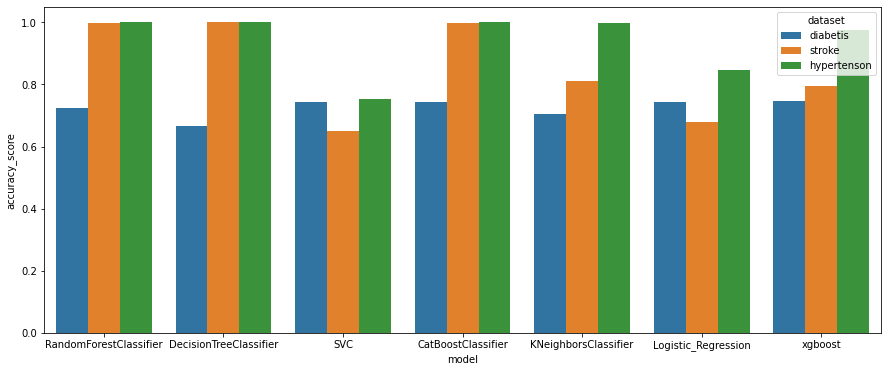

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(data=result_data,x='model',y='accuracy_score',hue='dataset')
plt.show()

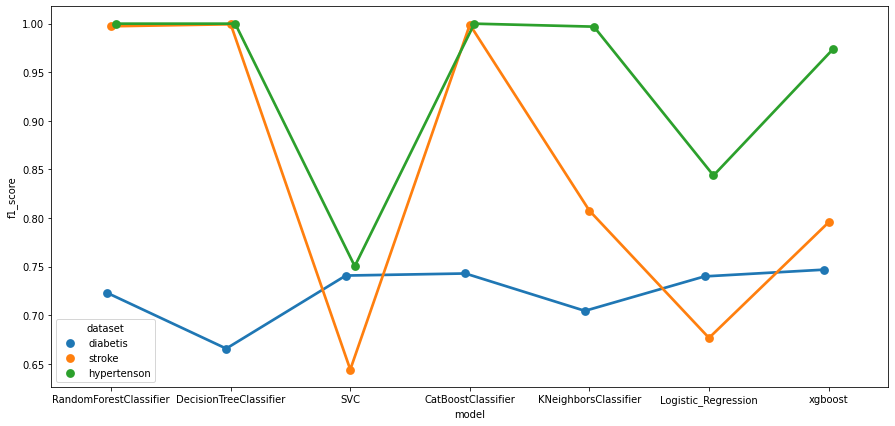

In [49]:
plt.figure(figsize=(15,7))
sns.pointplot(data=result_data, x="model", y="f1_score", hue="dataset", dodge=True)
plt.show()

In [53]:
fig = px.line(result_data, x="model", y="accuracy_score", color="dataset")
fig.update_traces(textposition="bottom right")
fig.show()

# Thanks for reading till the end ! If you liked the EDA, Model Training, Model Evaluation and Comparison,Predtictions
# pls do Upvote👍 and give some remarks/advice if you feels some things need to be added 